Loading Dataset and Inporting Libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.python import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
from google.colab import files
uploaded_train=files.upload()
uploaded_test=files.upload()


Saving test.csv to test.csv


Saving test.csv to test (1).csv


In [ ]:
train=np.loadtxt('train.csv',delimiter=',')
test=np.loadtxt('test.csv',delimiter=',')
TrainX=train[:,0:8]  #extracting input columns(0-8)
TrainY=train[:,8]    #extracting output colums(9)

TestX=test[:,0:8]  #extracting input columns(0-8)
TestY=test[:,8]    #extracting output colums(9)


Defining the Model

In [ ]:
model=Sequential()
model.add(Dense(24 ,input_shape=(8,),activation='relu')) #shape of data provided for training
#model.add(Dense(15,activation='tanh'))
model.add(Dense(12,activation='relu'))
#model.add(Dense(15,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()   #prints a summary of model created

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                216       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 629
Trainable params: 629
Non-trainable params: 0
_________________________________________________________________


Compiling the model(putting together optimiser and loss functions)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Fitting the model(Executing the model on data)

In [ ]:
model.fit(TrainX,TrainY,epochs=150,batch_size=10,verbose=0)   #fitting training data set

Evaluating training accuracy of the model(need to split the data for training and testing seperately)

In [ ]:
Trainloss,Trainaccuracy=model.evaluate(TrainX,TrainY,verbose=0) #Input and output data values
print("Training Accuracy is :%.2f" %(Trainaccuracy*100))
print("Losss is %.2f" %(Trainloss*100))

Training Accuracy is :80.60
Losss is 40.94


In [ ]:
model.fit(TestX,TestY,epochs=150,batch_size=10,verbose=0) #fitting testing data set

In [ ]:
Testloss,Testaccuracy=model.evaluate(TestX,TestY,verbose=0) #Input and output data values
print("Testing Accuracy is :%.2f" %(Testaccuracy*100))
print("Losss is %.2f" %(Testloss*100))

Testing Accuracy is :89.93
Losss is 25.92


Making Predictions

In [ ]:
pred=model.predict(TrainX)         #for training dataset
predictions=(pred >0.5).astype(int)
for i in range(20):
  print(TrainX[i],predictions[i],TrainY[i])

16/16 [==============================] - 0s 1ms/step
[  6.    148.     72.     35.      0.     33.6     0.627  50.   ] [1] 1.0
[ 1.    85.    66.    29.     0.    26.6    0.351 31.   ] [0] 0.0
[  8.    183.     64.      0.      0.     23.3     0.672  32.   ] [1] 1.0
[ 1.    89.    66.    23.    94.    28.1    0.167 21.   ] [0] 0.0
[  0.    137.     40.     35.    168.     43.1     2.288  33.   ] [1] 1.0
[  5.    116.     74.      0.      0.     25.6     0.201  30.   ] [0] 0.0
[ 3.    78.    50.    32.    88.    31.     0.248 26.   ] [0] 1.0
[ 10.    115.      0.      0.      0.     35.3     0.134  29.   ] [0] 0.0
[2.00e+00 1.97e+02 7.00e+01 4.50e+01 5.43e+02 3.05e+01 1.58e-01 5.30e+01] [1] 1.0
[  8.    125.     96.      0.      0.      0.      0.232  54.   ] [0] 1.0
[  4.    110.     92.      0.      0.     37.6     0.191  30.   ] [0] 0.0
[ 10.    168.     74.      0.      0.     38.      0.537  34.   ] [1] 1.0
[ 10.    139.     80.      0.      0.     27.1     1.441  57.   ] [1] 0.0
[

Making Predictions for testing dataset

In [ ]:
pred=model.predict(TestX)         #for training dataset
predictions=(pred >0.5).astype(int)
for i in range(20):
  print(TestX[i],predictions[i],TestY[i])

9/9 [==============================] - 0s 2ms/step
[  2.    117.     90.     19.     71.     25.2     0.313  21.   ] [0] 0.0
[ 3.    84.    72.    32.     0.    37.2    0.267 28.   ] [0] 0.0
[ 6.     0.    68.    41.     0.    39.     0.727 41.   ] [1] 1.0
[ 7.    94.    64.    25.    79.    33.3    0.738 41.   ] [0] 0.0
[ 3.    96.    78.    39.     0.    37.3    0.238 40.   ] [0] 0.0
[10.    75.    82.     0.     0.    33.3    0.263 38.   ] [0] 0.0
[  0.    180.     90.     26.     90.     36.5     0.314  35.   ] [1] 1.0
[  1.    130.     60.     23.    170.     28.6     0.692  21.   ] [0] 0.0
[ 2.    84.    50.    23.    76.    30.4    0.968 21.   ] [0] 0.0
[  8.    120.     78.      0.      0.     25.      0.409  64.   ] [0] 0.0
[12.    84.    72.    31.     0.    29.7    0.297 46.   ] [1] 1.0
[0.00e+00 1.39e+02 6.20e+01 1.70e+01 2.10e+02 2.21e+01 2.07e-01 2.10e+01] [0] 0.0
[ 9.  91.  68.   0.   0.  24.2  0.2 58. ] [0] 0.0
[ 2.    91.    62.     0.     0.    27.3    0.525 22.   ] [

Attempt to read an image for testing

In [ ]:
import numpy as np
import matplotlib.image as mlp
import matplotlib.pyplot as py
from PIL import Image

In [ ]:
img=mlp.imread("Pic1.jpg")
print(img.shape)
if(img.shape[2]==3):
  res=img.reshape(img.shape[0],-1)
else:
  res=img
#np.savetxt('Crackdata.csv',res)
print(res.shape)
#py.imshow(img)
#py.imshow(res)

(227, 227, 3)
(227, 681)


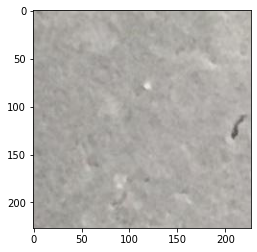

In [ ]:
image=Image.open('Pic1.jpg')
image.convert("1")
py.imshow(image)